In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
acc = pd.read_csv('US_Accidents_March23.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
acc.shape

(7728394, 46)

In [5]:
acc.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
acc['Severity'].unique()

array([3, 2, 1, 4], dtype=int64)

In [8]:
acc.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

### Finding percentage of missing values of each column

In [9]:
for col in acc.columns:
    pct_missing = np.mean(acc[col].isnull())
    if pct_missing > 0:
        print('{} - {:.2f}%'.format(col, pct_missing * 100))

End_Lat - 44.03%
End_Lng - 44.03%
Description - 0.00%
Street - 0.14%
City - 0.00%
Zipcode - 0.02%
Timezone - 0.10%
Airport_Code - 0.29%
Weather_Timestamp - 1.56%
Temperature(F) - 2.12%
Wind_Chill(F) - 25.87%
Humidity(%) - 2.25%
Pressure(in) - 1.82%
Visibility(mi) - 2.29%
Wind_Direction - 2.27%
Wind_Speed(mph) - 7.39%
Precipitation(in) - 28.51%
Weather_Condition - 2.24%
Sunrise_Sunset - 0.30%
Civil_Twilight - 0.30%
Nautical_Twilight - 0.30%
Astronomical_Twilight - 0.30%


In [10]:
acc.City.nunique()

13678

#### There are 13678 cities in this dataset

In [12]:
numerics = ['float64', 'int64']
numeric_acc = acc.select_dtypes(include=numerics)

In [13]:
numeric_acc

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,39.865147,-84.058723,NaN,NaN,0.010,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,2,39.928059,-82.831184,NaN,NaN,0.010,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,2,39.063148,-84.032608,NaN,NaN,0.010,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,3,39.747753,-84.205582,NaN,NaN,0.010,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,2,39.627781,-84.188354,NaN,NaN,0.010,36.0,33.3,89.0,29.65,6.0,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2,34.002480,-117.379360,33.99888,-117.37094,0.543,86.0,86.0,40.0,28.92,10.0,13.0,0.00
7728390,2,32.766960,-117.148060,32.76555,-117.15363,0.338,70.0,70.0,73.0,29.39,10.0,6.0,0.00
7728391,2,33.775450,-117.847790,33.77740,-117.85727,0.561,73.0,73.0,64.0,29.74,10.0,10.0,0.00
7728392,2,33.992460,-118.403020,33.98311,-118.39565,0.772,71.0,71.0,81.0,29.62,10.0,8.0,0.00


In [14]:
state_top = acc.State.value_counts()
state_top.head(20)

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
Name: State, dtype: int64

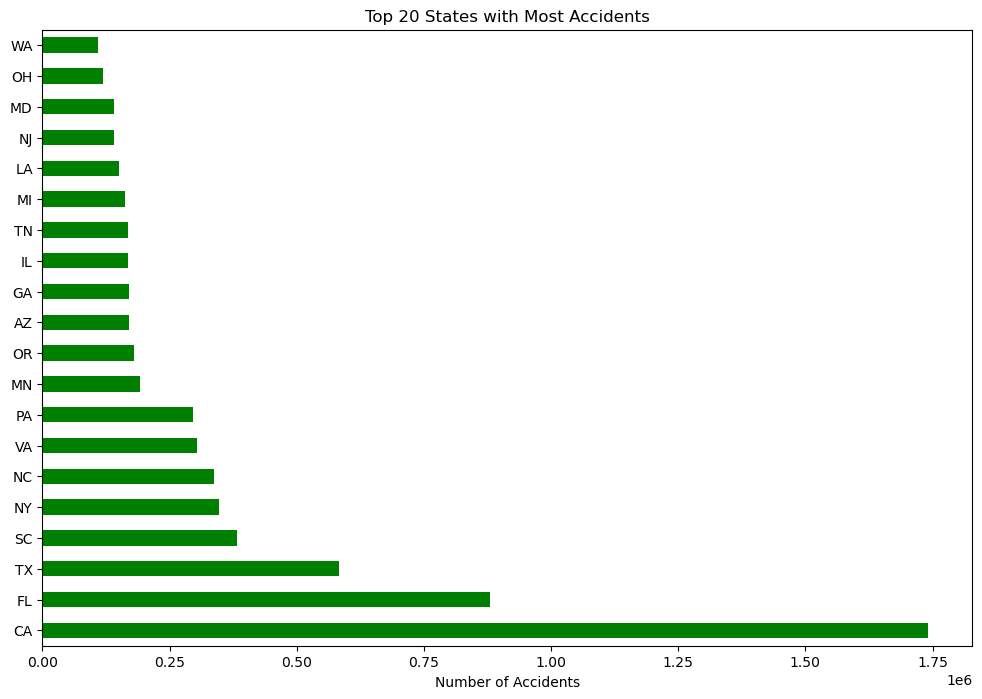

In [102]:
plt.figure(figsize=(12,8))
state_top.head(20).plot(kind='barh', color='green')
plt.xlabel("Number of Accidents")
plt.title("Top 20 States with Most Accidents")
plt.show()

### Top 20 Cities by number of accidents

In [16]:
cities_top = acc.City.value_counts()
cities_top.head(20)

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

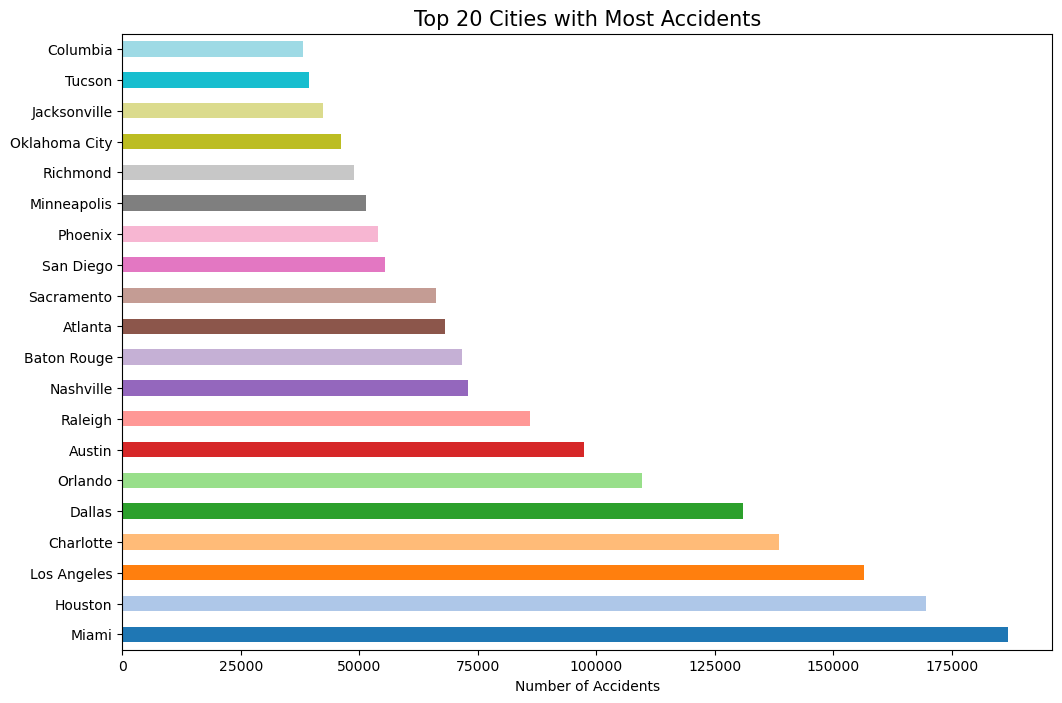

In [96]:
plt.figure(figsize=(12,8))
color_range = range(50)
cities_top.head(20).plot(kind='barh', color=plt.get_cmap('tab20')(range(len(color_range))))
plt.title("Top 20 Cities with Most Accidents", fontsize=15)
plt.xlabel("Number of Accidents")
plt.show()

In [18]:
cities_top[cities_top < 1000]

Coos Bay                        998
Hobe Sound                      996
Thousand Oaks                   995
Polk City                       994
Roosevelt                       994
                               ... 
Benkelman                         1
Old Appleton                      1
Wildrose                          1
Mc Nabb                           1
American Fork-Pleasant Grove      1
Name: City, Length: 12460, dtype: int64

In [19]:
cities_top[cities_top == 1]

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

### There are 1023 cities to have reported only 1 accident

In [21]:
cities_top[cities_top < 1000]

Coos Bay                        998
Hobe Sound                      996
Thousand Oaks                   995
Polk City                       994
Roosevelt                       994
                               ... 
Benkelman                         1
Old Appleton                      1
Wildrose                          1
Mc Nabb                           1
American Fork-Pleasant Grove      1
Name: City, Length: 12460, dtype: int64

### There are 12460 cities with less than 1000 accidents

In [23]:
acc.Start_Time = pd.to_datetime(acc['Start_Time'])

In [24]:
acc['End_Time'] = pd.to_datetime(acc['End_Time'])

### Hourly Accident

In [26]:
hour_accident = acc.Start_Time.dt.hour.value_counts().sort_index()
hour_accident

0     112378
1      97071
2      93227
3      83863
4     159852
5     228182
6     405837
7     587472
8     577576
9     363034
10    342706
11    355040
12    355001
13    396445
14    448846
15    525855
16    581969
17    576015
18    432042
19    295121
20    225226
21    191452
22    167645
23    126539
Name: Start_Time, dtype: int64

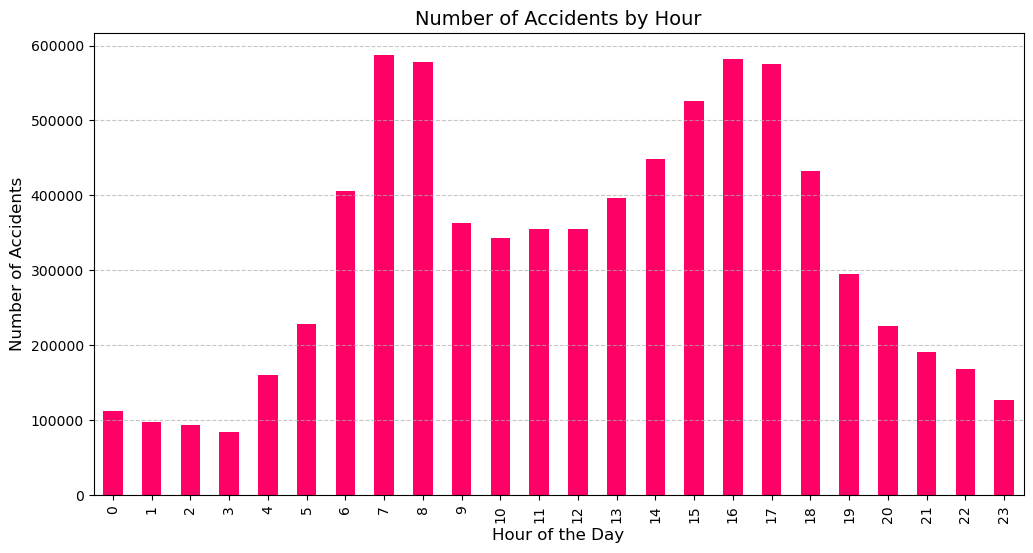

In [80]:
plt.figure(figsize=(12,6))
hour_accident.plot(kind='bar', color='#ff0066')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.title('Number of Accidents by Hour', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### As we can see most of the Accidents occured between 6am to 9am and 2pm to 6pm. 
### We can assume that in the morning people are leaving for work which may cause traffic.

In [28]:
## weekly accident

In [29]:
weekly_accident = acc.Start_Time.dt.day_of_week.value_counts().sort_index()

In [30]:
weekly_accident

0    1210921
1    1290929
2    1312389
3    1316229
4    1366499
5     668683
6     562744
Name: Start_Time, dtype: int64

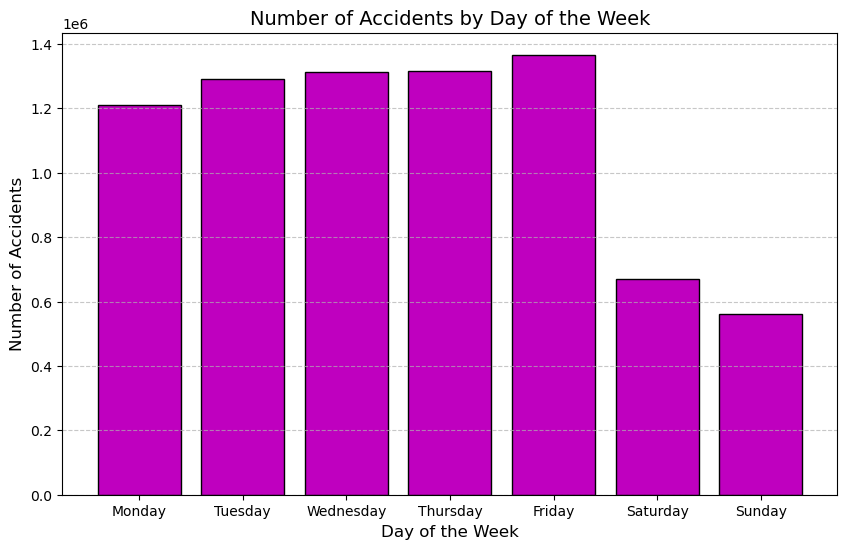

In [31]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
plt.bar(day_names, weekly_accident, color='m', edgecolor='black')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.title('Number of Accidents by Day of the Week', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###  As we can see from the above plot, the days with the most accidents are working days, while in the weekend there are less accidents. This may be due to the fact that during the weekend there are fewer cars on the road.

In [71]:
mon_day = acc.Start_Time[acc.Start_Time.dt.dayofweek == 0]
tues_day = acc.Start_Time[acc.Start_Time.dt.dayofweek == 1]
wednes_day = acc.Start_Time[acc.Start_Time.dt.dayofweek == 2]
thurs_day = acc.Start_Time[acc.Start_Time.dt.dayofweek == 3]
fri_day = acc.Start_Time[acc.Start_Time.dt.dayofweek == 4]
sat_day = acc.Start_Time[acc.Start_Time.dt.dayofweek == 5]
sun_day = acc.Start_Time[acc.Start_Time.dt.dayofweek == 6]

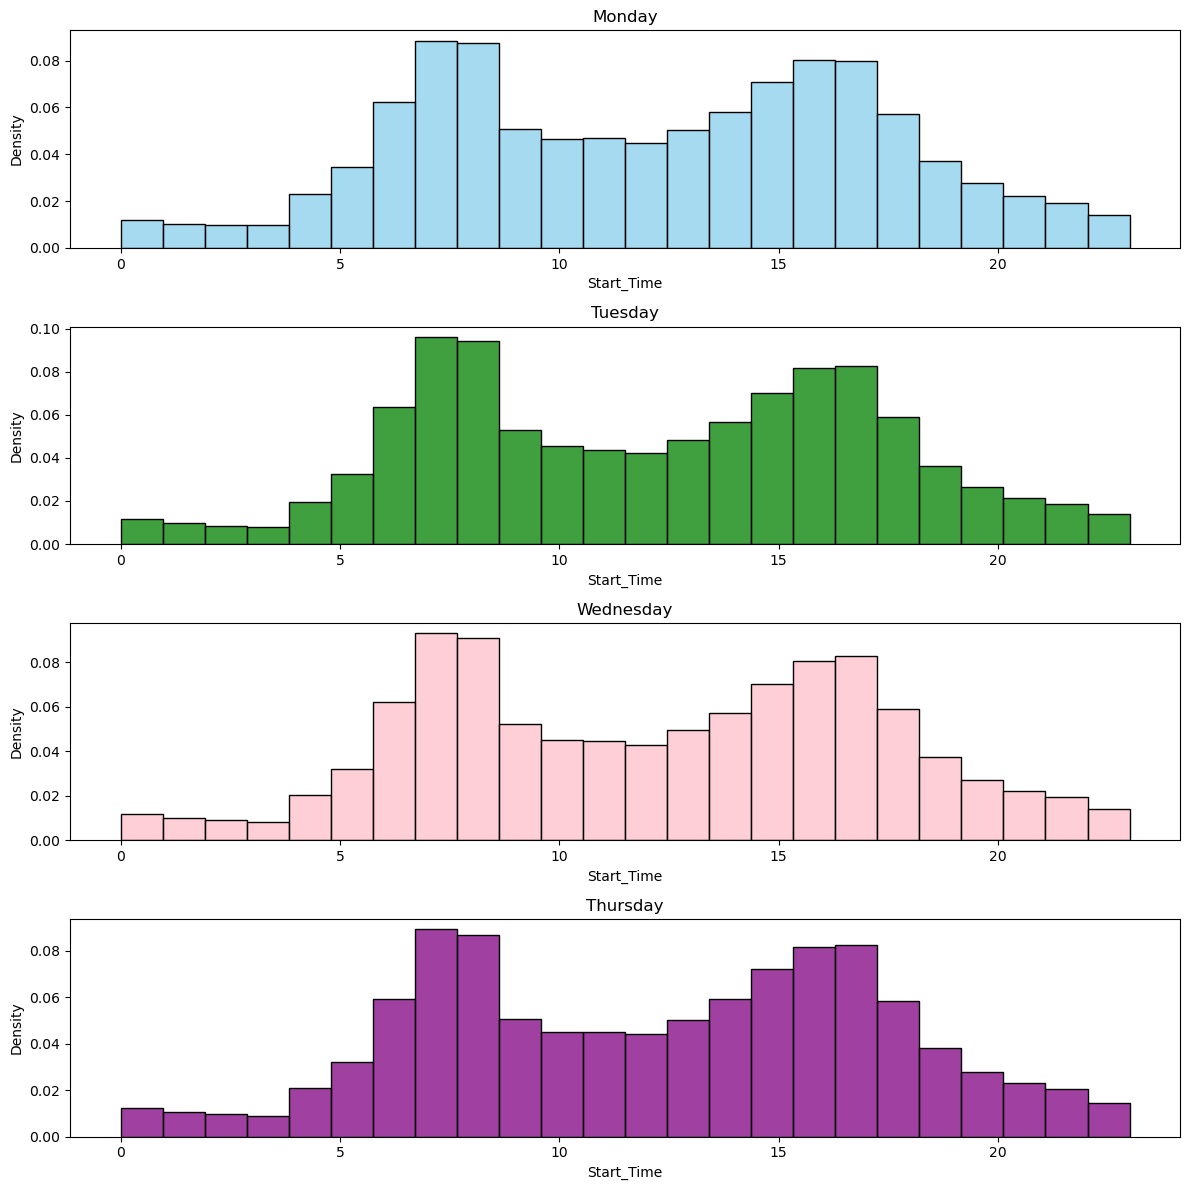

In [75]:
#Checking the distribution of accident on normal working days
fig, axis = plt.subplots(4, 1, figsize=(12, 12))
sns.histplot(mon_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[0], color='skyblue').set_title('Monday')
sns.histplot(tues_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[1], color='green').set_title('Tuesday')
sns.histplot(wednes_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[2], color='pink').set_title('Wednesday')
sns.histplot(thurs_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[3], color='purple').set_title('Thursday')
fig.tight_layout()
plt.show()

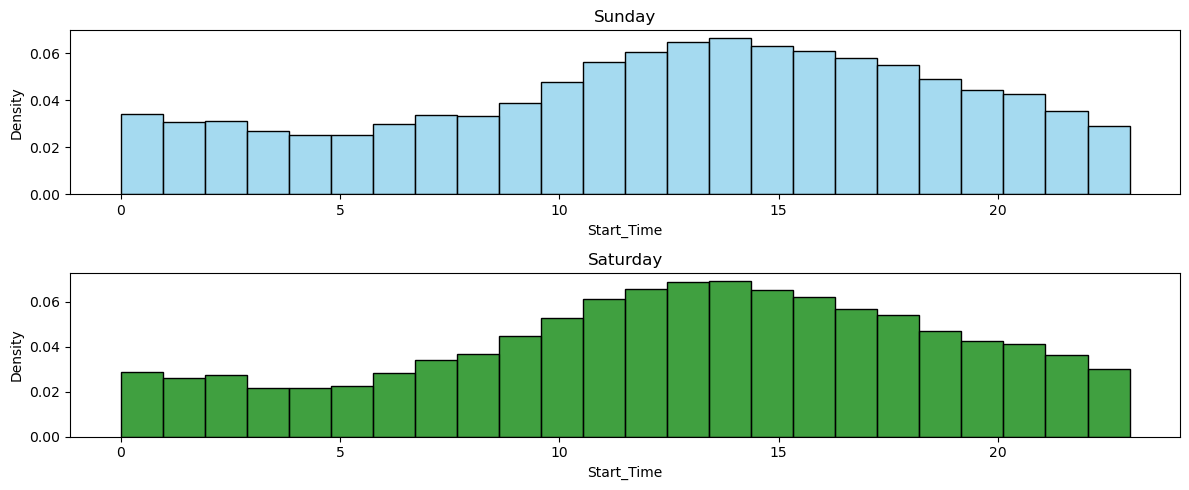

In [78]:
# Checking the distribution of accident on weekends
fig, axis = plt.subplots(2, 1, figsize=(12, 5))

sns.histplot(sun_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[0], color='skyblue')
axis[0].set_title('Sunday')

sns.histplot(sat_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[1], color='green')
axis[1].set_title('Saturday')

fig.tight_layout()
plt.show()

### We can see that there is the difference between the distribution of the accident time in weekends and weekdays, In weekends generally most of the accidents are happening betwen 10 am to 3pm while on weekdays most are occuring between '6am to 9am and then 3 pm to 5 pm.

In [33]:
monthly_accident = acc.Start_Time.dt.month.value_counts().sort_index()

In [34]:
monthly_accident

1     751946
2     658984
3     554595
4     587300
5     558176
6     571373
7     512335
8     599666
9     651381
10    675130
11    760165
12    847343
Name: Start_Time, dtype: int64

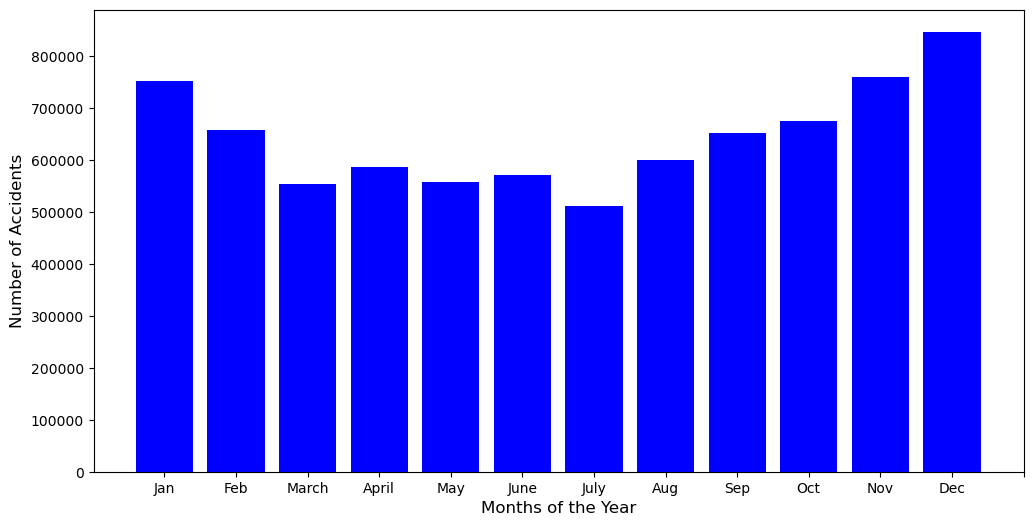

In [35]:
months = [
    'Jan', 'Feb', 'March', 'April', 'May', 'June',
    'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]
plt.figure(figsize=(12, 6))
plt.bar(months, monthly_accident, color='#0000ff')
plt.xlabel("Months of the Year", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(range(0, 13))
plt.show()

### From the above plot, most of the accidents are happening in winter.

In [36]:
acc.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [37]:
acc.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

## Creating a scatter plot of accidents with respect to their location using the given 'Start_Lng'(Longitude) & 'Start_Lat(Latitude)' columns

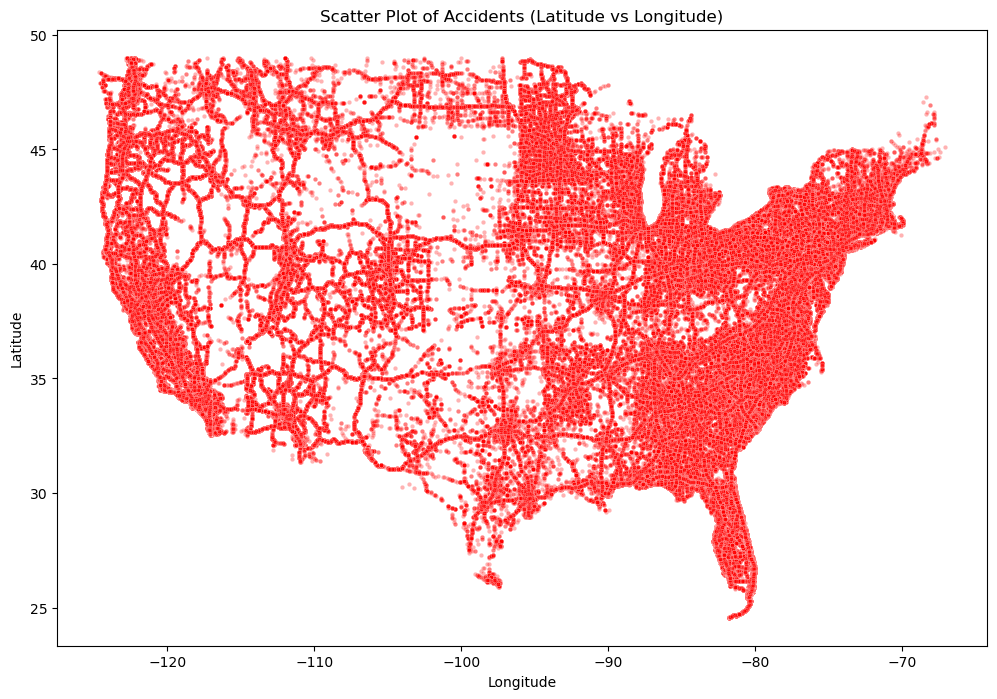

In [38]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=acc['Start_Lng'], y=acc['Start_Lat'], color='red', alpha=0.3, s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Accidents (Latitude vs Longitude)')
plt.show()

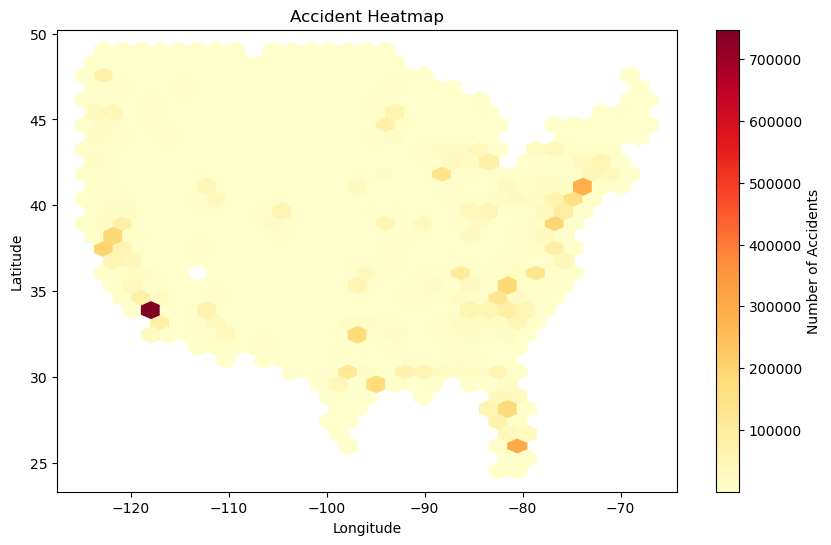

In [39]:
# Creating a heatmap of accident density using hexbin
plt.figure(figsize=(10, 6))
plt.hexbin(acc['Start_Lng'], acc['Start_Lat'], gridsize=30, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Number of Accidents')

plt.title('Accident Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

## Analysing the severity of the Accidents 

In [87]:
sev_plot = acc.Severity.value_counts()
sev_plot

2    6156981
3    1299337
4     204710
1      67366
Name: Severity, dtype: int64

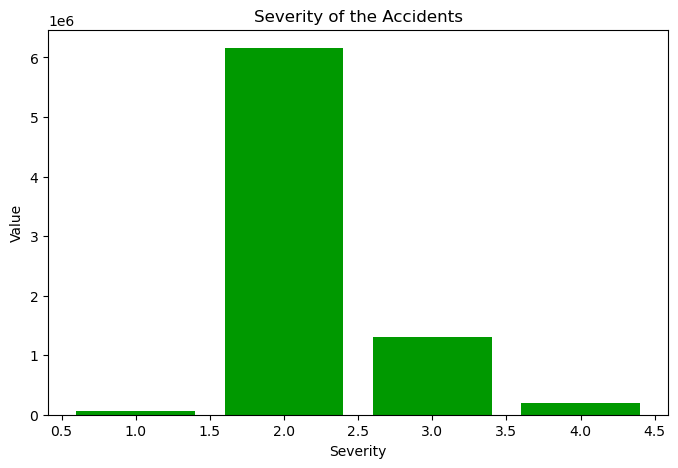

In [91]:
plt.figure(figsize=(8,5))
plt.bar(sev_plot.index,sev_plot, color='#009900')
plt.xlabel("Severity")
plt.ylabel("Value")
plt.title("Severity of the Accidents")
plt.show()


#### As we can see from the previous plot severity is highly unbalanced, the number of accident with the severity 1 is very small instead the number of accident with severity 2 is much higher.

# Results from the Analysis

<ul style="list-style-type: circle;">

    1. City-wise Accident Distribution:

 <li>The majority of cities have very few accidents, while only a small number of cities experience a significantly higher number of accidents.</li>
<li>Miami stands out as the city with the highest number of accidents.</li>




    2. Time of Day Impact:
<li>Most accidents occur during two time windows: 6 AM to 9 AM (morning rush hour) and 2 PM to 6 PM (afternoon and evening rush hours).</li>

    
    3. Weekday vs. Weekend Trends:

<li>Weekdays: Higher number of accidents, likely due to increased traffic from work-related commutes.</li>
<li>Weekends: Fewer accidents occur, possibly because there are fewer cars on the road.</li>

    4. Time Distribution on Weekends vs. Weekdays

<li>On weekends, accidents are more likely to happen between 10 AM and 3 PM.</li>
<li>On weekdays, accidents are concentrated during 6 AM to 9 AM and 3 PM to 5 PM.</li>

    5. Seasonal Trends

<li>Accidents are more likely to occur during the winter and rainy seasons, indicating that weather conditions significantly impact accident rates.</li>

### This analysis highlights patterns in accident occurrences based on time, day, location, and season, which could inform targeted safety measures or resource allocation.